In [1]:
# パッケージの読み込み
library("RMeCab")
library("dplyr")
# 分析対象とするテキスト（のみ）が入ったディレクトリのパスを指定
dir <- "C:/Users/Masahiro Kasahara/Desktop/Dataset"
# 複数ファイルを形態素解析し，頻度集計
docNgram.result <- docNgram(dir, type = 0, N = 2) %>%  # 文字2-gramを集計
  as.data.frame()  # データフレームに変換


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




file = C:/Users/Masahiro Kasahara/Desktop/Dataset/A_haguruma.txt Ngram = 2 
length = 7603 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/A_hana.txt Ngram = 2 
length = 2465 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/A_rashomon.txt Ngram = 2 
length = 2443 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/A_torokko.txt Ngram = 2 
length = 2017 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/A_un.txt Ngram = 2 
length = 2745 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/D_hanafubuki.txt Ngram = 2 
length = 7027 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/D_hashire_merosu.txt Ngram = 2 
length = 3964 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/D_ningen_shikkaku.txt Ngram = 2 
length = 14936 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/D_shayo.txt Ngram = 2 
length = 14643 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/D_tsugaru.txt Ngram = 2 
length = 22393 

file = C:/Users/Masahiro Kasahara/Desktop/Dataset/F_gakumonno_dokuritsu.txt N

In [2]:
# パッケージの読み込み
library("tidyr")
library("stringr")
# 16種類の文字と読点の2-gramの頻度を集計
docNgram.result.2 <- docNgram.result[docNgram.result$Ngram %in% c("[か-、]", "[が-、]", "[く-、]", "[し-、]", "[ず-、]", "[て-、]", "[で-、]", "[と-、]", "[に-、]", "[は-、]", "[ば-、]", "[へ-、]", "[も-、]", "[ら-、]", "[り-、]", "[れ-、]"), ] %>%  # 文字と読点の2-gramを集計
  spread(., key = Ngram, value = Freq)  # データ形式を変換
rownames(docNgram.result.2) <- docNgram.result.2$Text  # 行ラベルを付与
rownames(docNgram.result.2) <- str_replace(rownames(docNgram.result.2), pattern = ".txt", replacement = "")  # 行ラベルを編集（.txtを削除）
colnames(docNgram.result.2) <- c("author", "か", "が", "く", "し", "ず", "て", "で", "と", "に", "は", "ば", "へ", "も", "ら", "り", "れ")  # 列ラベルを編集
docNgram.result.2$author <- c(rep("芥川", 5), rep("太宰", 5), rep("福沢", 5), rep("森", 5), rep("夏目", 5))  # 作者に関する情報を含む列を作成
# 集計済みの頻度表を確認
docNgram.result.2

,author,か,が,く,し,ず,て,で,と,に,は,ば,へ,も,ら,り,れ
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A_haguruma,芥川,8,48,0,27,0,1,0,19,5,3,9,6,8,47,35,12
A_hana,芥川,1,21,2,1,2,46,17,13,21,58,7,1,16,15,5,1
A_rashomon,芥川,4,31,5,3,2,48,21,20,26,74,8,0,10,34,6,1
A_torokko,芥川,3,17,1,1,0,0,0,19,31,23,2,2,10,24,8,0
A_un,芥川,12,43,8,1,2,45,33,31,29,61,7,4,35,45,3,0
D_hanafubuki,太宰,23,54,20,24,15,100,35,19,31,94,27,3,73,22,44,7
D_hashire_merosu,太宰,8,21,5,14,5,50,17,14,21,131,8,0,29,25,16,5
D_ningen_shikkaku,太宰,80,280,141,205,69,528,224,139,240,742,32,1,329,211,167,70
D_shayo,太宰,88,311,100,112,49,924,314,211,293,842,41,9,451,383,141,31


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "


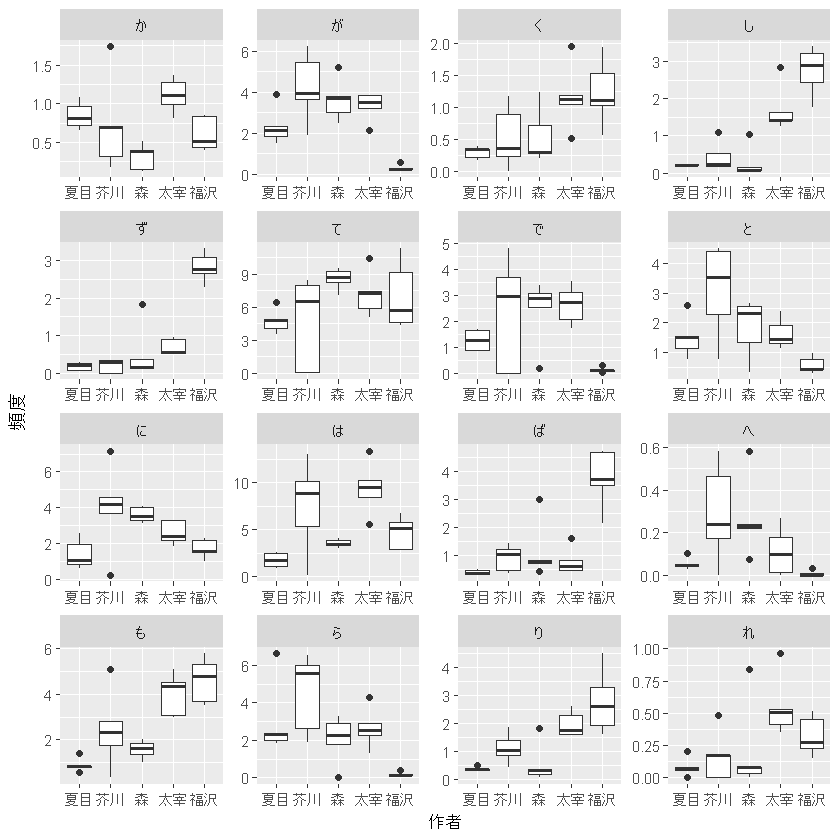

In [3]:
# パッケージの読み込み
library("ggplot2")
# 相対頻度に変換
docNgram.result.3 <- spread(docNgram.result, key = Ngram, value = Freq)  # wide形式に変換
tokens <- rowSums(docNgram.result.3[, -1])  # テキストごとの頻度の総計を計算
docNgram.result.2[, 2 : 17] <- docNgram.result.2[, 2 : 17] / tokens * 1000  # 頻度の相対化
# 描画用にデータを整形
docNgram.long <- gather(docNgram.result.2, key = "文字", value = "頻度", -author)  # long形式に変換
colnames(docNgram.long) <- c("作者", "文字", "頻度")  # 列ラベルを編集
# 箱ひげ図を作成
ggplot(docNgram.long, aes(x = 作者, y = 頻度)) +  # 描画に用いるデータフレームと変数を指定
  geom_boxplot() +  # 描画の形式を指定
  facet_wrap(~文字, ncol = 4, scales = "free") +  # 全ての変数をまとめて描画
  theme_gray(base_family = "HiraKakuPro-W3")  # 日本語フォントを指定

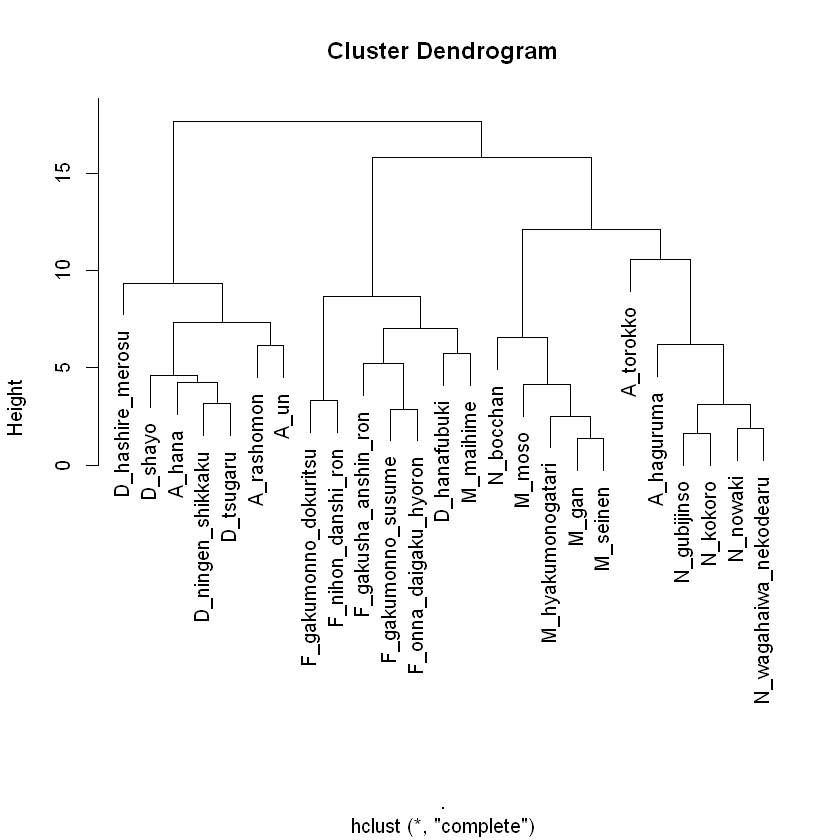

In [4]:
# 階層型クラスター分析
docNgram.result.2[, 2 : 17] %>%  # 分析データを指定
  dist() %>%  # ユークリッド距離（デフォルト）
  hclust() %>%  # 最長一致法（デフォルト）
  plot()  # デンドログラムの形式で可視化

Installing package into 'C:/Users/Masahiro Kasahara/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'FactoMineR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Masahiro Kasahara\AppData\Local\Temp\RtmpQlWkuI\downloaded_packages


Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


**Results of the Correspondence Analysis (CA)**
The row variable has  25  categories; the column variable has 16 categories
The chi square of independence between the two variables is equal to 299.0926 (p-value =  0.9915072 ).
*The results are available in the following objects:

   name              description                   
1  "$eig"            "eigenvalues"                 
2  "$col"            "results for the columns"     
3  "$col$coord"      "coord. for the columns"      
4  "$col$cos2"       "cos2 for the columns"        
5  "$col$contrib"    "contributions of the columns"
6  "$row"            "results for the rows"        
7  "$row$coord"      "coord. for the rows"         
8  "$row$cos2"       "cos2 for the rows"           
9  "$row$contrib"    "contributions of the rows"   
10 "$call"           "summary called parameters"   
11 "$call$marge.col" "weights of the columns"      
12 "$call$marge.row" "weights of the rows"         

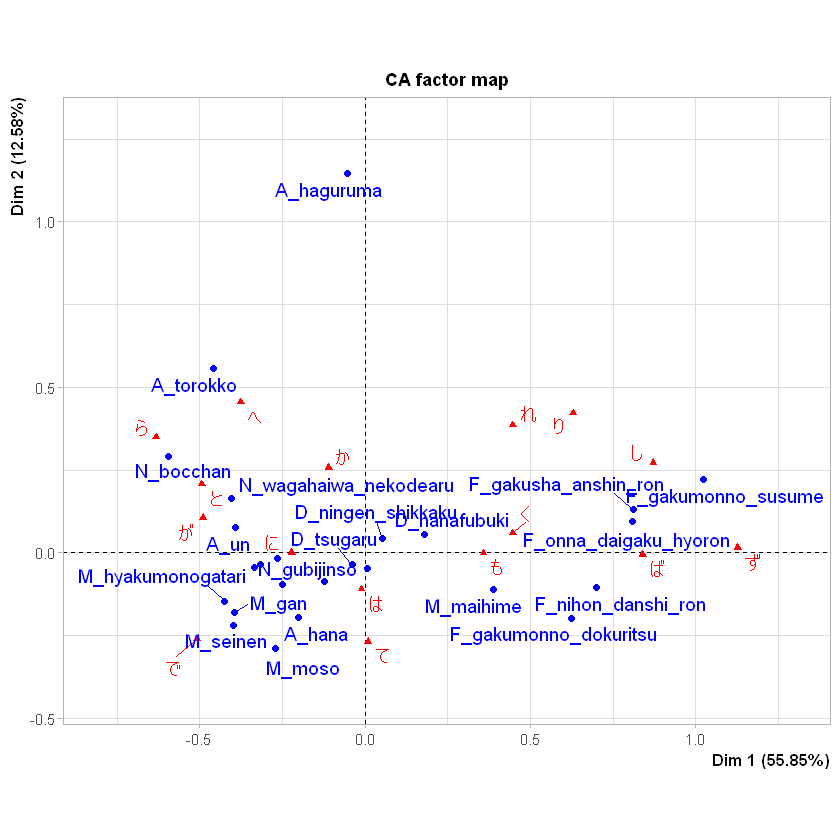

In [5]:
# パッケージのインストール（初回のみ）
install.packages("FactoMineR", dependencies = TRUE)
# パッケージの読み込み
library("FactoMineR")
# 対応分析
CA(docNgram.result.2[, 2 : 17])

サポートベクターマシン

In [58]:
# パッケージのインストール（初回のみ）
#install.packages("e1071", dependencies = TRUE)
# パッケージの読み込み
library("e1071")
# SVM
set.seed(1)  # 乱数のシードを固定
svm(as.factor(author) ~ ., cross = 13, data = docNgram.result.2) %>%  # SVM（13-foldの交差妥当化）
 summary()  # 結果の概要を表示


Call:
svm(formula = as.factor(author) ~ ., data = docNgram.result.2, cross = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  24

 ( 5 5 4 5 5 )


Number of Classes:  5 

Levels: 
 夏目 芥川 森 太宰 福沢

10-fold cross-validation on training data:

Total Accuracy: 76 
Single Accuracies:
 50 100 100 66.66667 100 66.66667 100 66.66667 100 33.33333 




ランダムフォレスト

In [40]:
# パッケージのインストール（初回のみ）
#install.packages("randomForest", dependencies = TRUE)
# パッケージの読み込み
library("randomForest")
# ランダムフォレスト
set.seed(100)  # 乱数のシードを固定
rf.model <- randomForest(as.factor(author) ~ ., data = docNgram.result.2, mtry = 4, proximity = TRUE)  # ランダムフォレスト
rf.model  # 結果の確認


Call:
 randomForest(formula = as.factor(author) ~ ., data = docNgram.result.2,      mtry = 4, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 16%
Confusion matrix:
     夏目 芥川 森 太宰 福沢 class.error
夏目    5    0  0    0    0         0.0
芥川    1    2  2    0    0         0.6
森      0    0  4    0    1         0.2
太宰    0    0  0    5    0         0.0
福沢    0    0  0    0    5         0.0

In [ ]:
#チューニング
rfTuning <- tuneRF(x = docNgram.result.2[,2:17], y = as.factor(docNgram.result.2$author),
                   stepFactor = 2, improve = 0.05, trace = TRUE, plot = TRUE, doBest = TRUE )

In [8]:
# 変数の重要度を確認
rf.model$importance

,MeanDecreaseGini
か,1.2260362
が,1.2672580
く,0.3720782
し,2.1533435
ず,1.7390924
て,0.7094302
で,0.9595421
と,0.6060952
に,1.4750861
は,1.8443643


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
" Windows のフォントデータベースにフォントファミリが見付かりません "


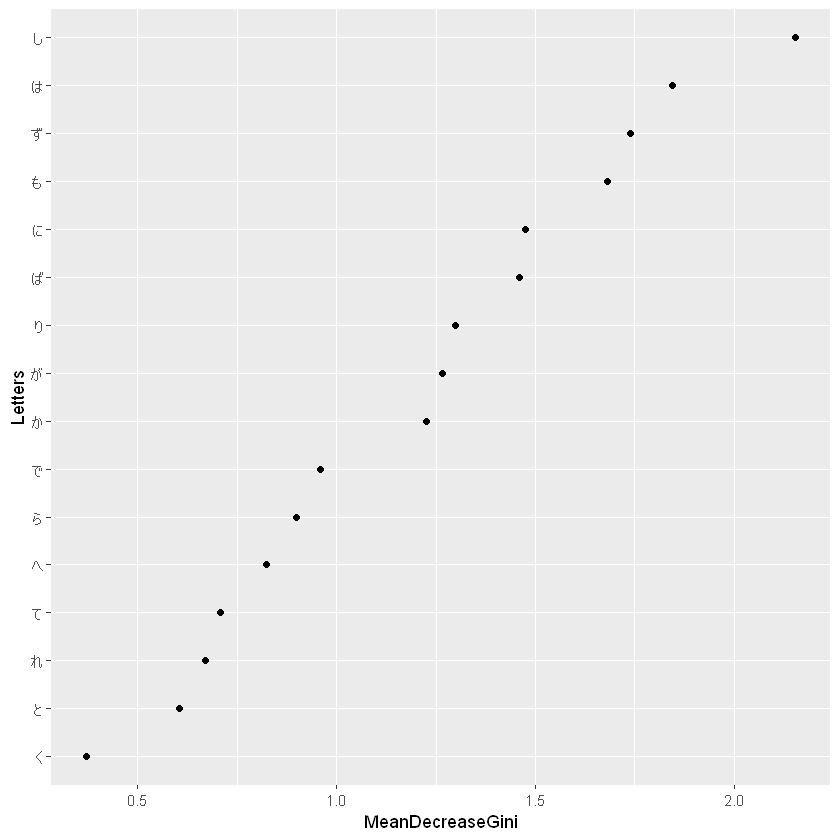

In [9]:
# パッケージの読み込み
library("tibble")
# 描画用にデータを整形
varimp <- rf.model$importance %>%  # 変数重要度（ジニ係数の平均減分）を抽出
  as.data.frame() %>%  # データフレームに変換
  rownames_to_column(., "letters")  # 行ラベルを列として追加
 # ドットチャートを作成
ggplot(varimp, aes(y = reorder(letters, MeanDecreaseGini), x = MeanDecreaseGini)) +  # 描画に用いるデータフレームと変数を指定（変数重要度の高い順に並び替え）
  geom_point() +  # 描画の形式を指定
  ylab("Letters") + # y軸のラベルを指定
  theme_gray(base_family = "HiraKakuPro-W3")  # 日本語フォントを指定

,Dim.1,Dim.2,作者
,<dbl>,<dbl>,<chr>
A_haguruma,-0.16599422,0.25249195,芥川
A_hana,-0.12989959,-0.27033907,芥川
A_rashomon,-0.16361326,-0.24139320,芥川
A_torokko,-0.14518442,-0.10529979,芥川
A_un,-0.08117105,-0.35933252,芥川
D_hanafubuki,0.30425149,-0.26780831,太宰
D_hashire_merosu,0.26728187,-0.27353350,太宰
D_ningen_shikkaku,0.27121807,-0.40130068,太宰
D_shayo,0.17609026,-0.48513325,太宰


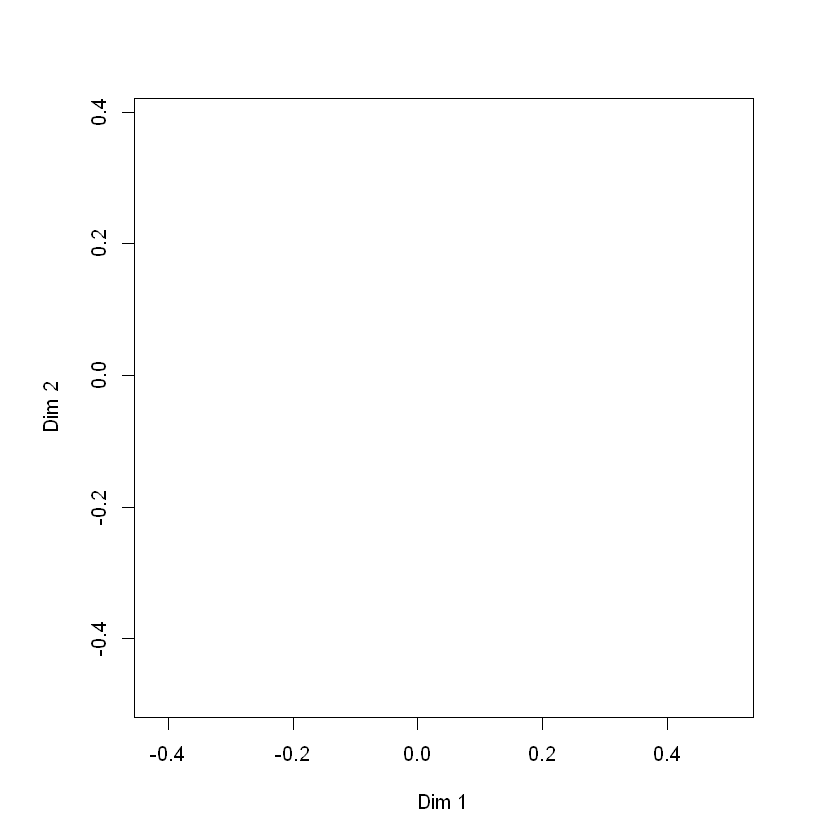

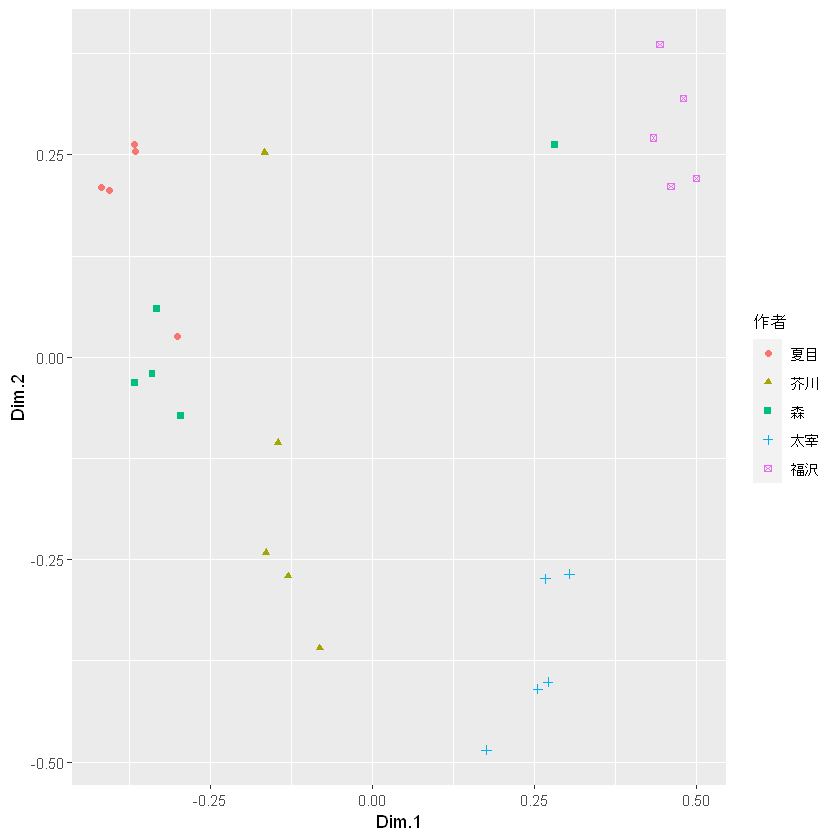

In [11]:
# 警告を非表示
options(warn = -1)
# ランダムフォレストの結果に基づく多次元尺度法
mdsp <- MDSplot(rf.model, as.factor(docNgram.result.2$作者))$points %>%
  as.data.frame()  # データフレームに変換
colnames(mdsp) <- c("Dim.1", "Dim.2")  # 列ラベルを編集
mdsp$作者 <- c(rep("芥川", 5), rep("太宰", 5), rep("福沢", 5), rep("森", 5), rep("夏目", 5))  # 「作者」の列を追加
mdsp  # 描画用のデータフレームを確認
# 散布図を作成
ggplot(as.data.frame(mdsp), aes(x = Dim.1, y = Dim.2)) +  # 描画に用いるデータフレームと変数を指定
 geom_point(aes(colour = 作者)) +  # 描画の形式を指定
 aes(shape = 作者) +  # ポイントの形を指定
 theme_gray(base_family = "HiraKakuPro-W3")  # 日本語フォントを指定

mtry = 4  OOB error = 16% 
Searching left ...
mtry = 2 	OOB error = 20% 
-0.25 0.05 
Searching right ...
mtry = 8 	OOB error = 16% 
0 0.05 


ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias):  デバイス png() を開始できませんでした 


plot without title

In [12]:
# パッケージのインストール（初回のみ）
#install.packages(c("caret", "kernlab"), dependencies = TRUE)
# パッケージの読み込み
library("caret")
library("kernlab")

# SVM（10-foldの交差妥当化）
set.seed(1)  # 乱数のシードを固定
tuneGrid <- expand.grid(.C = c(0.5, 1), .sigma = c(0.005, 0.01))  # 探索するハイパーパラメータ空間を指定
trControl <- trainControl(method = "cv", number = 10)  # 交差妥当化のnを指定
svm.caret <- train(as.factor(author) ~ ., data = docNgram.result.2, method = "svmRadial", tuneGrid = tuneGrid, trControl = trControl)  # グリッドサーチ
# グリッドサーチの結果を確認
svm.caret

Loading required package: lattice


Attaching package: 'kernlab'


The following object is masked from 'package:ggplot2':

    alpha




Support Vector Machines with Radial Basis Function Kernel 

4601 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4142, 4141, 4141, 4141, 4140, 4140, ... 
Resampling results across tuning parameters:

  C    sigma  Accuracy   Kappa    
  0.5  0.005  0.9208865  0.8320396
  0.5  0.010  0.9282783  0.8481370
  1.0  0.005  0.9258874  0.8431626
  1.0  0.010  0.9326266  0.8577377

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.01 and C = 1.